In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df=pd.read_csv(r"C:\Users\Samwise Stark\Downloads\Assignment_4_data\Assignment_4_data\Movie_collection_Independent.csv")
dft=pd.read_csv(r"C:\Users\Samwise Stark\Downloads\Assignment_4_data\Assignment_4_data\Movie_collection_Target.csv")

In [3]:
df.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [4]:
dft.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [7]:
df.shape

(506, 19)

In [8]:
dft.shape

(506, 1)

In [11]:
df_final = pd.concat([df, dft], axis = 1)
df_final.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0,2.266667
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0,2.106667
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1,2.980000
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0,2.893333
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0,3.080000


In [13]:
df_final.shape

(506, 20)

In [19]:
df_final.isnull().sum()

Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Avg_age_actors         0
Num_multiplex          0
3D_available           0
Genre_Thriller         0
Genre_Drama            0
Genre_Comedy           0
Collection             0
dtype: int64

In [21]:
df_final.describe()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy,Collection
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.218182,260.832095,39.181818,545.043478,0.551383,0.361660,0.191700,0.306324,2.168590
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.169624,104.779133,12.513697,106.332889,0.497845,0.480957,0.394028,0.461422,0.612145
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.490000,223.796000,28.000000,465.000000,0.000000,0.000000,0.000000,0.000000,1.801667
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,159.980000,254.400000,39.000000,535.500000,1.000000,0.000000,0.000000,0.000000,2.080000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.610000,283.416000,50.000000,614.750000,1.000000,1.000000,0.000000,1.000000,2.333333
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [22]:
import seaborn as sns

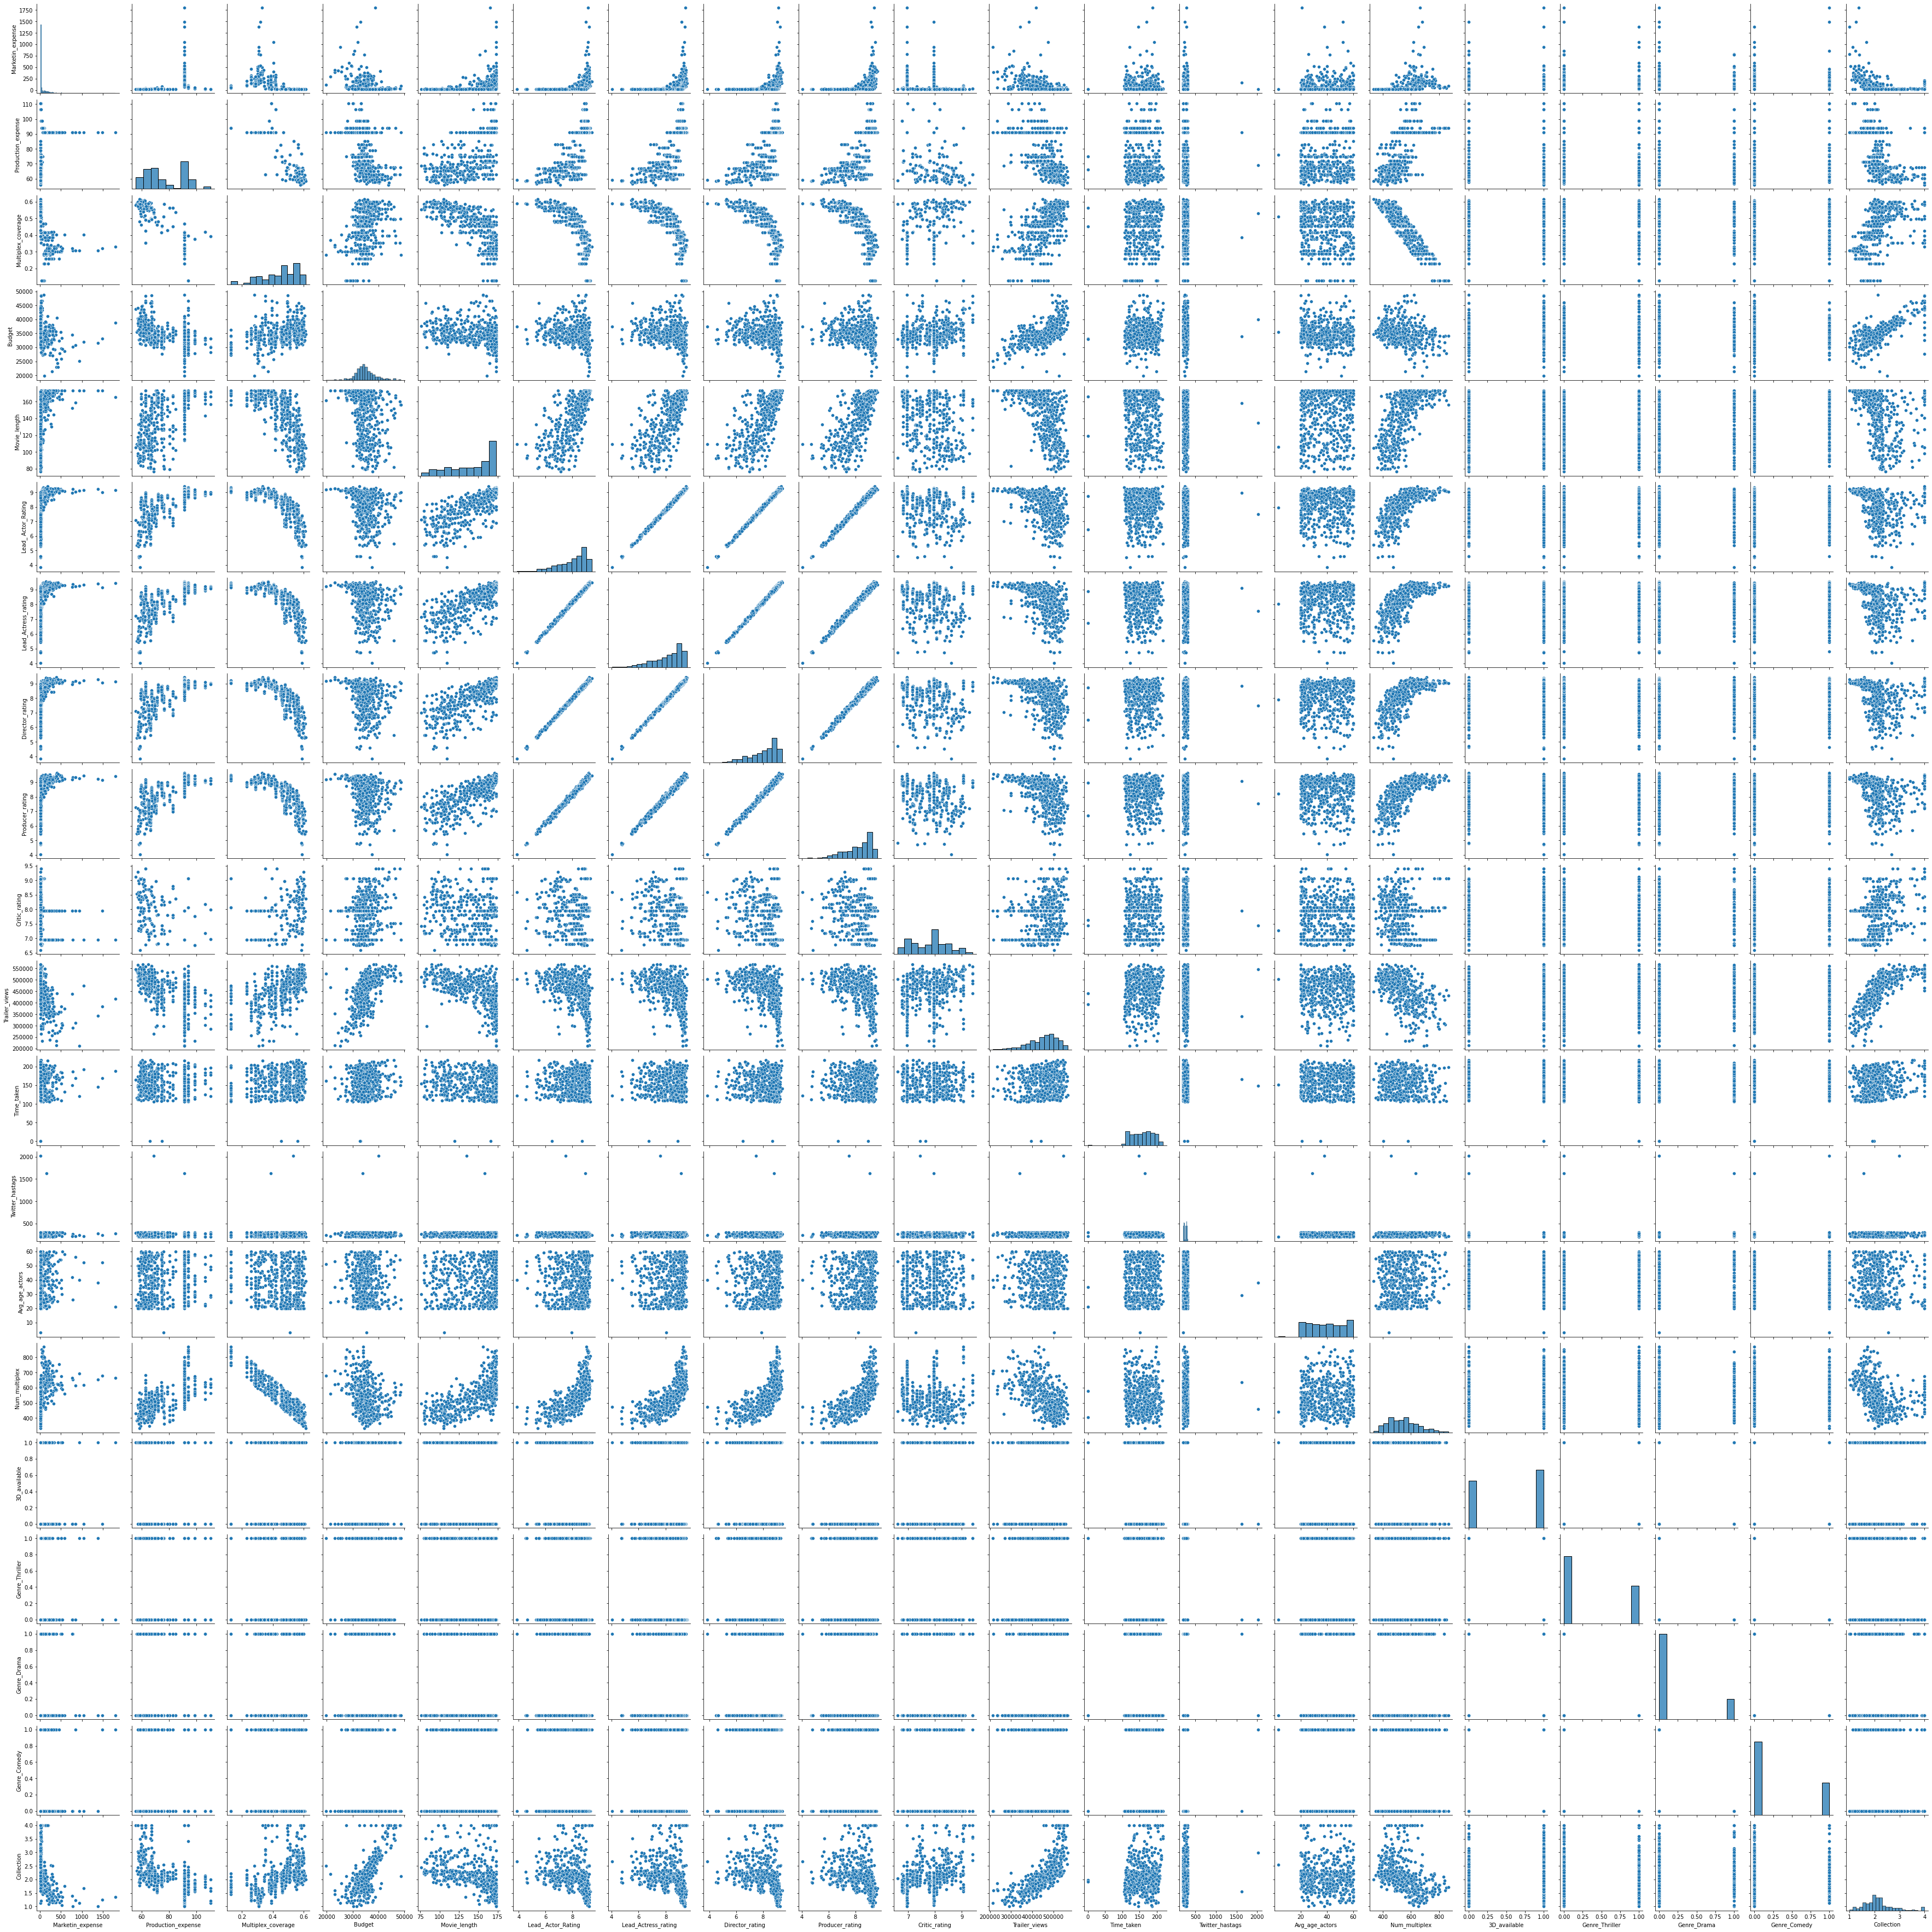

In [23]:
sns.pairplot(data=df_final)

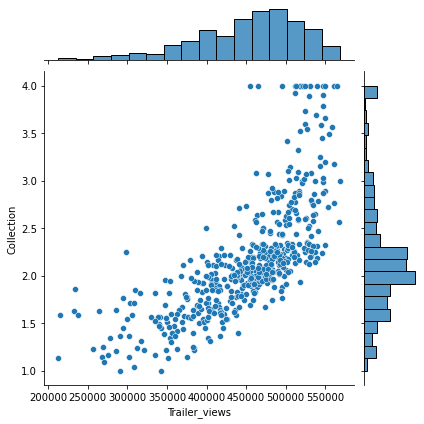

In [25]:
sns.jointplot(x='Trailer_views', y='Collection', data=df_final)

C:\Users\Harshad\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Collection', ylabel='Density'>

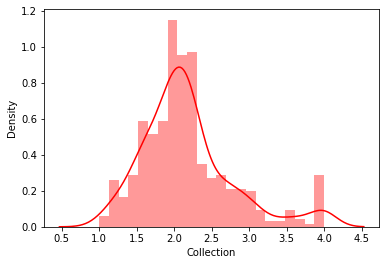

In [26]:
sns.distplot(df_final.Collection, color='red')

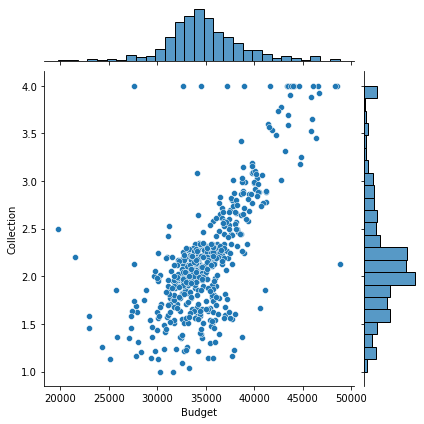

In [27]:
sns.jointplot(x='Budget', y='Collection', data=df_final)

In [30]:
corr=df_final.corr()

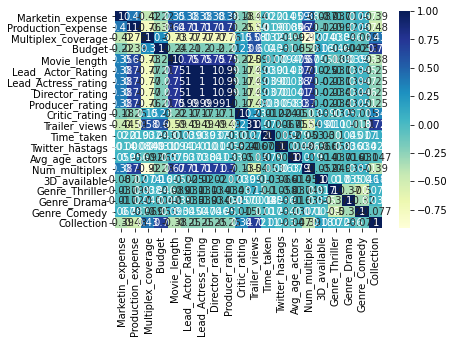

In [33]:
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df, dft)

In [35]:
x_train.shape

(379, 19)

In [36]:
x_test.shape

(127, 19)

In [37]:
y_train.shape

(379, 1)

In [38]:
y_test.shape

(127, 1)

In [39]:
x_valid, train_x= x_train[:188], x_train[188:]

In [40]:
y_valid, train_y= y_train[:188], y_train[188:]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(train_x)
X_valid=scaler.transform(x_valid)
X_test=scaler.transform(x_test)

In [49]:
X_train.shape

(191, 19)

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
model=keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=[19]),
    tf.keras.layers.Dense(30, activation='relu'),             
    tf.keras.layers.Dense(1)])

In [52]:
model.compile(optimizer=keras.optimizers.SGD(lr=1e-2),
              loss="mean_squared_error",
              metrics=['mae'])

C:\Users\Harshad\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [53]:
model_history=model.fit(X_train, train_y, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
6/6 [==============================] - 1s 51ms/step - loss: 4.8277 - mae: 2.0106 - val_loss: 2.0905 - val_mae: 1.1654
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 1.3142 - mae: 0.9153 - val_loss: 1.0539 - val_mae: 0.7723
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7854 - mae: 0.6680 - val_loss: 0.8397 - val_mae: 0.6800
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.6189 - mae: 0.5910 - val_loss: 0.7019 - val_mae: 0.6234
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5033 - mae: 0.5325 - val_loss: 0.5803 - val_mae: 0.5705
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4243 - mae: 0.4840 - val_loss: 0.4898 - val_mae: 0.5293
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.3681 - mae: 0.4513 - val_loss: 0.4080 - val_mae: 0.4900
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3205 - mae: 0.4174

Epoch 64/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0726 - mae: 0.2033 - val_loss: 0.2580 - val_mae: 0.3203
Epoch 65/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0717 - mae: 0.2028 - val_loss: 0.2590 - val_mae: 0.3214
Epoch 66/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0711 - mae: 0.2023 - val_loss: 0.2529 - val_mae: 0.3183
Epoch 67/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0707 - mae: 0.2017 - val_loss: 0.2550 - val_mae: 0.3205
Epoch 68/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0698 - mae: 0.2002 - val_loss: 0.2499 - val_mae: 0.3182
Epoch 69/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0691 - mae: 0.1994 - val_loss: 0.2543 - val_mae: 0.3215
Epoch 70/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0688 - mae: 0.1985 - val_loss: 0.2570 - val_mae: 0.3243
Epoch 71/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0683 - mae: 0

In [54]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 6}

In [55]:
model_history.history

{'loss': [4.827670097351074,
  1.314244270324707,
  0.7853532433509827,
  0.6189284920692444,
  0.5032526850700378,
  0.424271821975708,
  0.36812710762023926,
  0.3205426335334778,
  0.2867225110530853,
  0.25873321294784546,
  0.23737066984176636,
  0.22120985388755798,
  0.2064146101474762,
  0.19408205151557922,
  0.1832864135503769,
  0.1738409698009491,
  0.1660548746585846,
  0.15902388095855713,
  0.1531321108341217,
  0.1474248319864273,
  0.14139147102832794,
  0.13794822990894318,
  0.1346760094165802,
  0.13076059520244598,
  0.12558284401893616,
  0.12273794412612915,
  0.12000039219856262,
  0.11745960265398026,
  0.11501327902078629,
  0.11207914352416992,
  0.10966929793357849,
  0.1077873483300209,
  0.10513851046562195,
  0.10402611643075943,
  0.10159508138895035,
  0.10074622184038162,
  0.09884531050920486,
  0.09691965579986572,
  0.09507665783166885,
  0.09394257515668869,
  0.09211397171020508,
  0.09135191142559052,
  0.08978860825300217,
  0.08815569430589676,

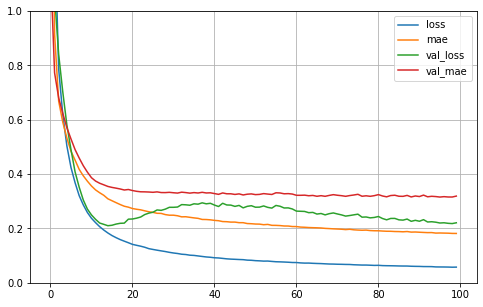

In [56]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [57]:
test_loss, test_acc= model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1167 - mae: 0.2644


In [59]:
print("Tested Loss:",test_loss)

Tested Loss: 0.11672840267419815


In [60]:
prediction=model.predict(X_test)

4/4 [==============================] - 0s 0s/step


In [61]:
X_new=X_test[:6]

In [67]:
y_pred=model.predict(X_new)
print(y_test[:6])
print(y_pred)

1/1 [==============================] - 0s 38ms/step
     Collection
361    1.993333
255    2.060000
474    1.586667
455    1.606667
11     1.926667
65     2.233333
[[2.2620292]
 [2.184043 ]
 [1.5812564]
 [1.6691548]
 [2.1101193]
 [2.5067983]]
